# Importing needed libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
import seaborn as sns
import matplotlib.style as style
import matplotlib.gridspec as gridspec
import scipy.stats as stats
import plotly.graph_objs as go
import plotly.offline as py
from scipy import stats
from scipy.stats import f_oneway
from scipy.stats import chi2_contingency

import matplotlib.pyplot as plt

# Importing dataset using Kaggle

In [2]:
train_df  = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/train.csv')

In [3]:
test_df  = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/test.csv')

# Getting famaliar with the Housing Price Dataset

In [4]:
train_df.shape

(1460, 81)

In [5]:
train_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [6]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [7]:
all_columns = train_df.columns
all_columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [8]:
train_df['MSZoning'].unique()

array(['RL', 'RM', 'C (all)', 'FV', 'RH'], dtype=object)

In [9]:
train_df['Street'].unique()

array(['Pave', 'Grvl'], dtype=object)

In [10]:
train_df['Alley'].unique()

array([nan, 'Grvl', 'Pave'], dtype=object)

In [11]:
train_df['LotShape'].unique()

array(['Reg', 'IR1', 'IR2', 'IR3'], dtype=object)

In [12]:
train_df['LandContour'].unique()

array(['Lvl', 'Bnk', 'Low', 'HLS'], dtype=object)

In [13]:
train_df['Utilities']

0       AllPub
1       AllPub
2       AllPub
3       AllPub
4       AllPub
         ...  
1455    AllPub
1456    AllPub
1457    AllPub
1458    AllPub
1459    AllPub
Name: Utilities, Length: 1460, dtype: object

In [14]:
train_df['LotConfig'].unique()

array(['Inside', 'FR2', 'Corner', 'CulDSac', 'FR3'], dtype=object)

In [15]:
train_df['Neighborhood'].unique()

array(['CollgCr', 'Veenker', 'Crawfor', 'NoRidge', 'Mitchel', 'Somerst',
       'NWAmes', 'OldTown', 'BrkSide', 'Sawyer', 'NridgHt', 'NAmes',
       'SawyerW', 'IDOTRR', 'MeadowV', 'Edwards', 'Timber', 'Gilbert',
       'StoneBr', 'ClearCr', 'NPkVill', 'Blmngtn', 'BrDale', 'SWISU',
       'Blueste'], dtype=object)

In [16]:
train_df['PoolQC'].unique()

array([nan, 'Ex', 'Fa', 'Gd'], dtype=object)

In [17]:
train_df['Fence'].unique()

array([nan, 'MnPrv', 'GdWo', 'GdPrv', 'MnWw'], dtype=object)

In [18]:
train_df['MiscFeature'].unique()

array([nan, 'Shed', 'Gar2', 'Othr', 'TenC'], dtype=object)

In [19]:
train_df['Condition2'].unique()

array(['Norm', 'Artery', 'RRNn', 'Feedr', 'PosN', 'PosA', 'RRAn', 'RRAe'],
      dtype=object)

In [20]:
train_df['LandSlope'].unique()

array(['Gtl', 'Mod', 'Sev'], dtype=object)

In [21]:
train_df['RoofMatl'].unique()

array(['CompShg', 'WdShngl', 'Metal', 'WdShake', 'Membran', 'Tar&Grv',
       'Roll', 'ClyTile'], dtype=object)

In [22]:
train_df['Heating'].unique()

array(['GasA', 'GasW', 'Grav', 'Wall', 'OthW', 'Floor'], dtype=object)

In [23]:
train_df['LowQualFinSF'].unique()

array([  0, 360, 513, 234, 528, 572, 144, 392, 371, 390, 420, 473, 156,
       515,  80,  53, 232, 481, 120, 514, 397, 479, 205, 384])

<Axes: >

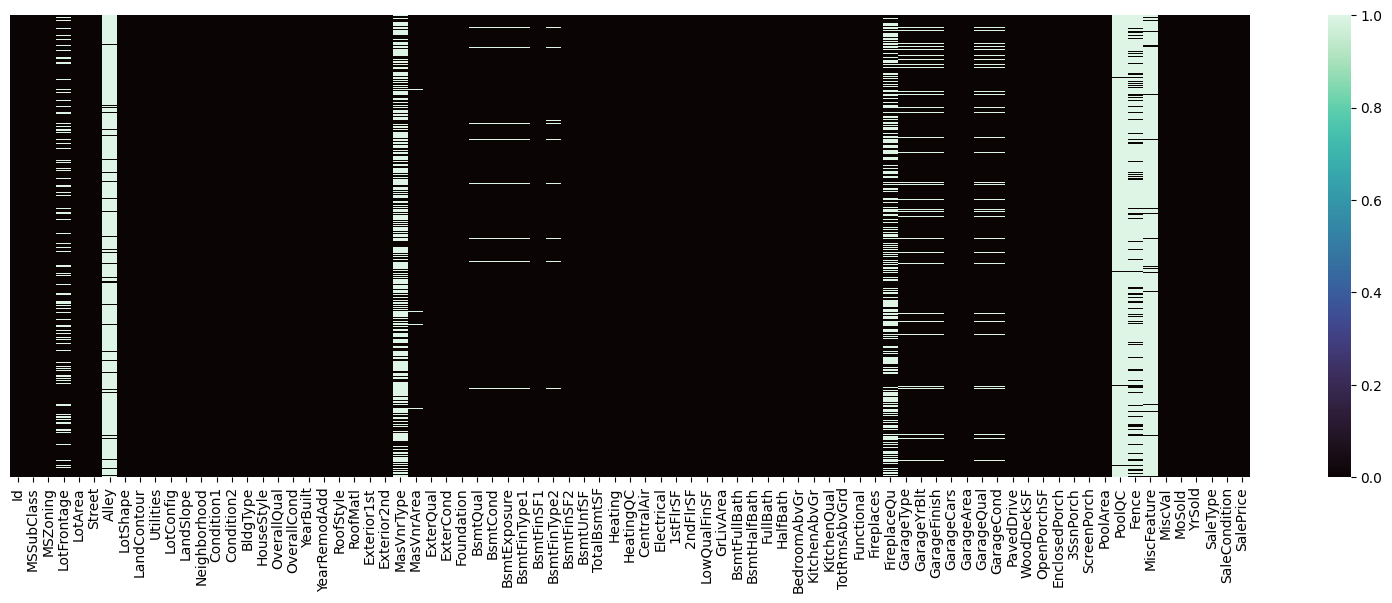

In [24]:
plt.figure(figsize=(20,6))
sns.heatmap(train_df.isnull(),yticklabels=False,cbar=True,cmap='mako')

In [25]:
train_df.isna().sum()[:30]

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
Street             0
Alley           1369
LotShape           0
LandContour        0
Utilities          0
LotConfig          0
LandSlope          0
Neighborhood       0
Condition1         0
Condition2         0
BldgType           0
HouseStyle         0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
RoofStyle          0
RoofMatl           0
Exterior1st        0
Exterior2nd        0
MasVnrType       872
MasVnrArea         8
ExterQual          0
ExterCond          0
Foundation         0
dtype: int64

In [26]:
train_df.isna().sum()[30:]

BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinSF1          0
BsmtFinType2       38
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFinSF        0
GrLivArea           0
BsmtFullBath        0
BsmtHalfBath        0
FullBath            0
HalfBath            0
BedroomAbvGr        0
KitchenAbvGr        0
KitchenQual         0
TotRmsAbvGrd        0
Functional          0
Fireplaces          0
FireplaceQu       690
GarageType         81
GarageYrBlt        81
GarageFinish       81
GarageCars          0
GarageArea          0
GarageQual         81
GarageCond         81
PavedDrive          0
WoodDeckSF          0
OpenPorchSF         0
EnclosedPorch       0
3SsnPorch           0
ScreenPorch         0
PoolArea            0
PoolQC           1453
Fence            1179
MiscFeature      1406
MiscVal   

# Drop unnecessary features 

In [27]:
count_Street = len(train_df[train_df['Street'] == 'Pave'])
count_Street

1454

In [28]:
count_Street = len(train_df[train_df['Street'] == 'Grvl'])
count_Street

6

In [29]:
count_Alley = len(train_df[train_df['Alley'] == 'Grvl'])
count_Alley

50

In [30]:
columns_to_drop = ['Id', 'Street', 'Alley', 'PoolQC', 'Fence', 'MiscFeature']
train_df = train_df.drop(columns=columns_to_drop)

# Dealing with null values

In [31]:
columns_with_null_values = train_df.columns[train_df.isnull().any()]
columns_with_null_values

Index(['LotFrontage', 'MasVnrType', 'MasVnrArea', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Electrical',
       'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish',
       'GarageQual', 'GarageCond'],
      dtype='object')

In [32]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 75 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   LotShape       1460 non-null   object 
 5   LandContour    1460 non-null   object 
 6   Utilities      1460 non-null   object 
 7   LotConfig      1460 non-null   object 
 8   LandSlope      1460 non-null   object 
 9   Neighborhood   1460 non-null   object 
 10  Condition1     1460 non-null   object 
 11  Condition2     1460 non-null   object 
 12  BldgType       1460 non-null   object 
 13  HouseStyle     1460 non-null   object 
 14  OverallQual    1460 non-null   int64  
 15  OverallCond    1460 non-null   int64  
 16  YearBuilt      1460 non-null   int64  
 17  YearRemodAdd   1460 non-null   int64  
 18  RoofStyl

### Handling null values in numerical features

In [33]:
numeric_features = ['LotFrontage', 'MasVnrArea', 'GarageYrBlt']

In [34]:
numeric_imputer = SimpleImputer(strategy='mean')

In [35]:
train_df[numeric_features] = numeric_imputer.fit_transform(train_df[numeric_features])

### Handling null values in categorical features

In [36]:
categorical_features = ['MasVnrType', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtExposure', 'BsmtFinType1',
                        'BsmtFinType2','Electrical', 'Electrical', 'Electrical', 'Electrical', 'GarageQual',
                        'Electrical', 'GarageCond', 'GarageFinish', 'GarageType', 'FireplaceQu']

In [37]:
categorical_imputer = SimpleImputer(strategy='most_frequent')

In [38]:
train_df[categorical_features] = categorical_imputer.fit_transform(train_df[categorical_features])

<Axes: >

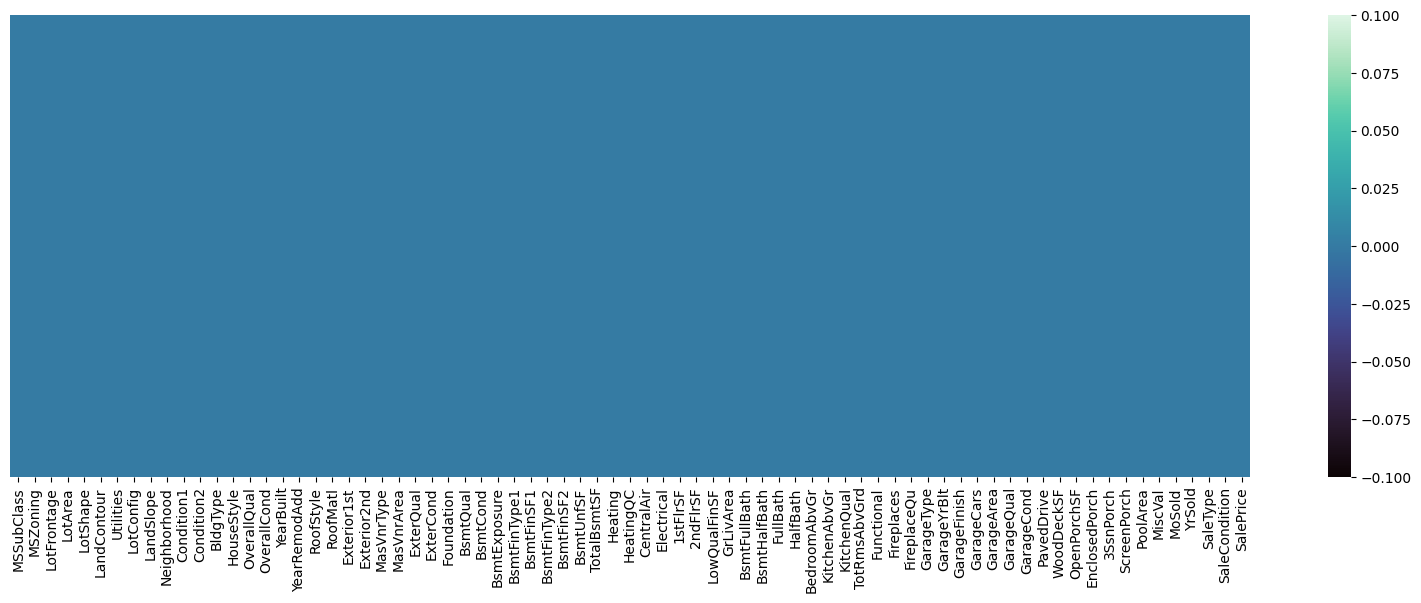

In [39]:
plt.figure(figsize=(20,6))
sns.heatmap(train_df.isnull(),yticklabels=False,cbar=True,cmap='mako')

# Getting famalliar with each feature

## Numerical features

In [40]:
def plot_numerical_feature_hist(feature_name, df):
    plt.figure(figsize=(8, 6))
    sns.histplot(data=df, x=feature_name, kde=True, bins=30)
    plt.title(f'Distribution of {feature_name}')
    plt.xlabel(feature_name)
    plt.ylabel('Frequency')
    plt.show()

In [41]:
def plot_numerical_feature_dist(feature_name, df):
    sns.distplot(df[feature_name]);

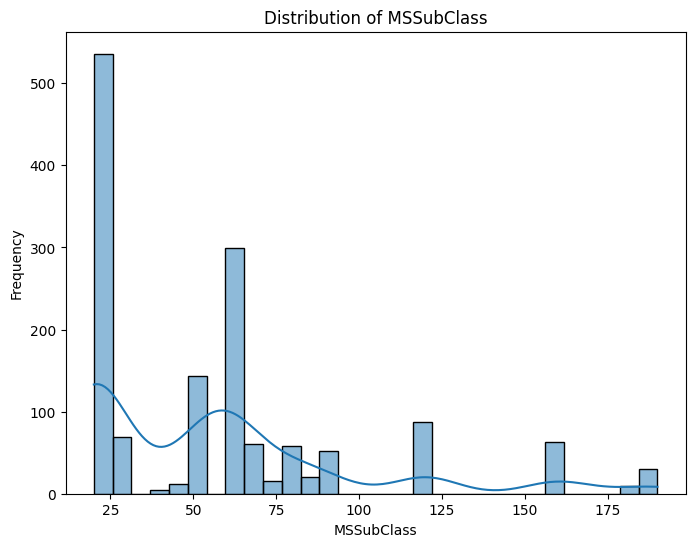

In [42]:
plot_numerical_feature_hist('MSSubClass', train_df)

/tmp/ipykernel_32/959534888.py:2: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




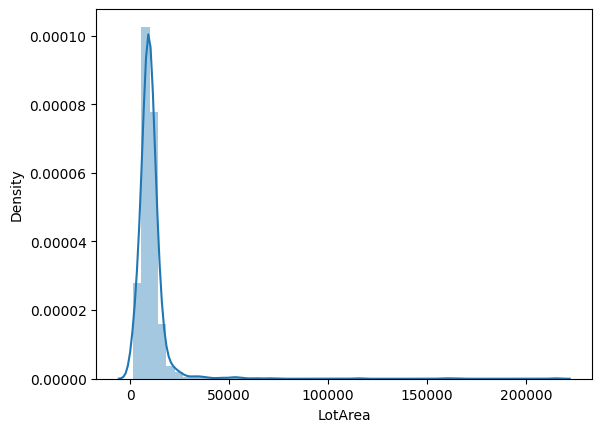

In [43]:
plot_numerical_feature_dist('LotArea', train_df)

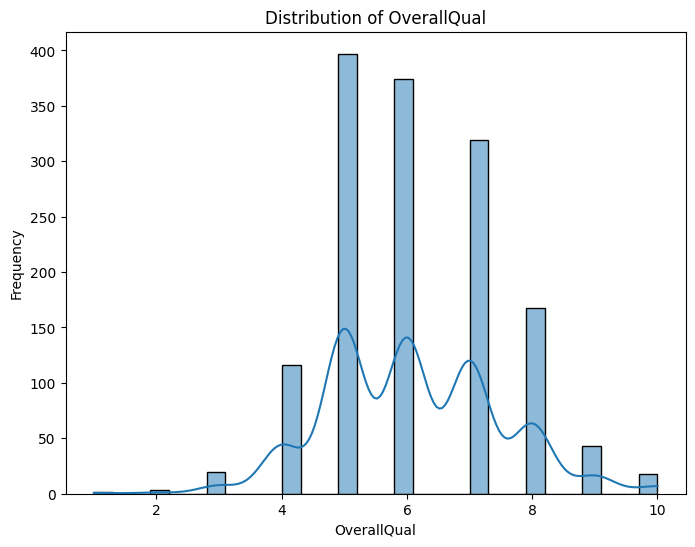

In [44]:
plot_numerical_feature_hist('OverallQual', train_df)

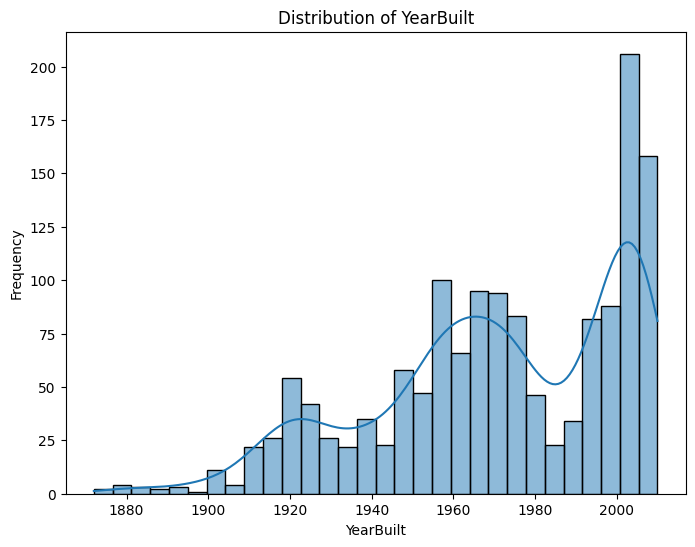

In [45]:
plot_numerical_feature_hist('YearBuilt', train_df)

/tmp/ipykernel_32/959534888.py:2: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




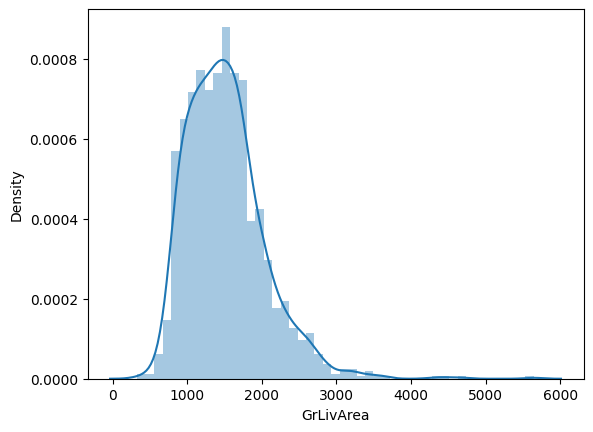

In [46]:
plot_numerical_feature_dist('GrLivArea', train_df)

In [47]:
display(train_df.describe().transpose())

,count,mean,std,min,25%,50%,75%,max
MSSubClass,1460.0,56.897260,42.300571,20.0,20.00,50.000000,70.00,190.0
LotFrontage,1460.0,70.049958,22.024023,21.0,60.00,70.049958,79.00,313.0
LotArea,1460.0,10516.828082,9981.264932,1300.0,7553.50,9478.500000,11601.50,215245.0
OverallQual,1460.0,6.099315,1.382997,1.0,5.00,6.000000,7.00,10.0
OverallCond,1460.0,5.575342,1.112799,1.0,5.00,5.000000,6.00,9.0
YearBuilt,1460.0,1971.267808,30.202904,1872.0,1954.00,1973.000000,2000.00,2010.0
YearRemodAdd,1460.0,1984.865753,20.645407,1950.0,1967.00,1994.000000,2004.00,2010.0
MasVnrArea,1460.0,103.685262,180.569112,0.0,0.00,0.000000,164.25,1600.0
BsmtFinSF1,1460.0,443.639726,456.098091,0.0,0.00,383.500000,712.25,5644.0
BsmtFinSF2,1460.0,46.549315,161.319273,0.0,0.00,0.000000,0.00,1474.0


## Categorical features

In [48]:
def plot_categorical_features_hist(feature_name, df):
    plt.figure(figsize=(8, 6))
    sns.countplot(data=df, x=feature_name)
    plt.title(f'Distribution of {feature_name}')
    plt.xlabel(feature_name)
    plt.ylabel('Count')
    plt.xticks(rotation=45)  
    plt.show()

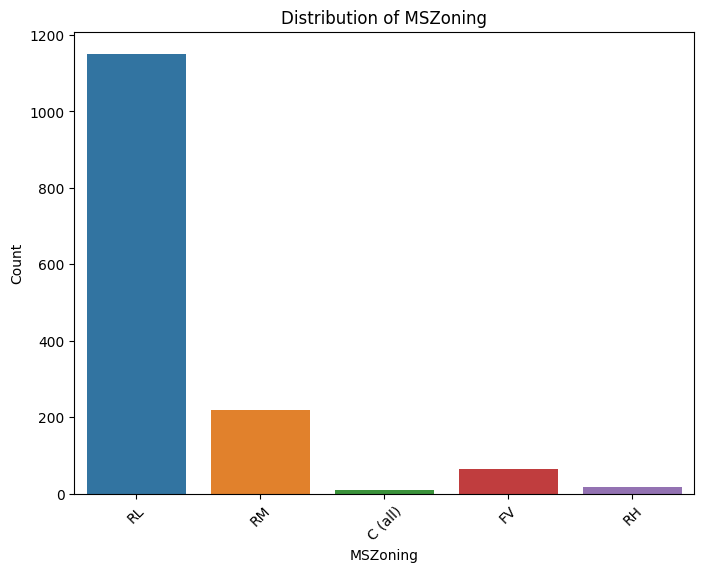

In [49]:
plot_categorical_features_hist('MSZoning', train_df)

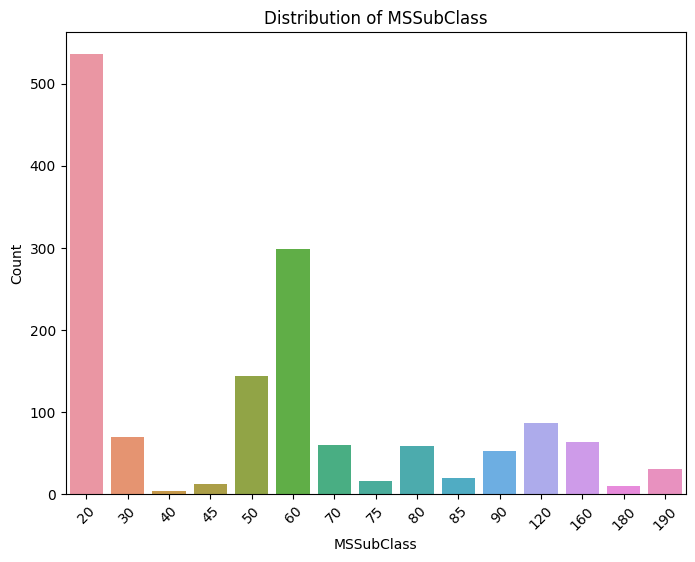

In [50]:
plot_categorical_features_hist('MSSubClass', train_df)

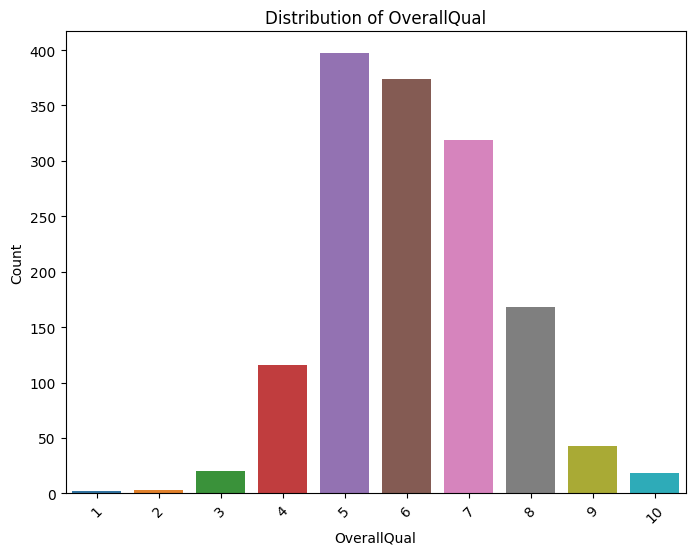

In [51]:
plot_categorical_features_hist('OverallQual', train_df)

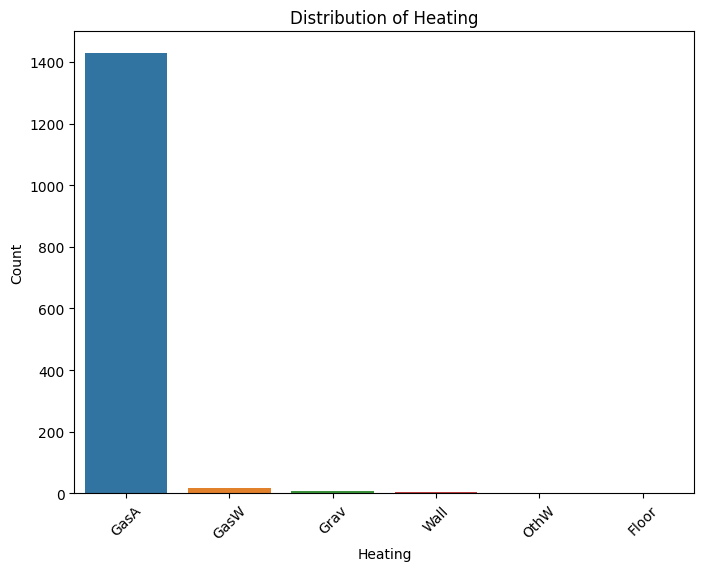

In [52]:
plot_categorical_features_hist('Heating', train_df)

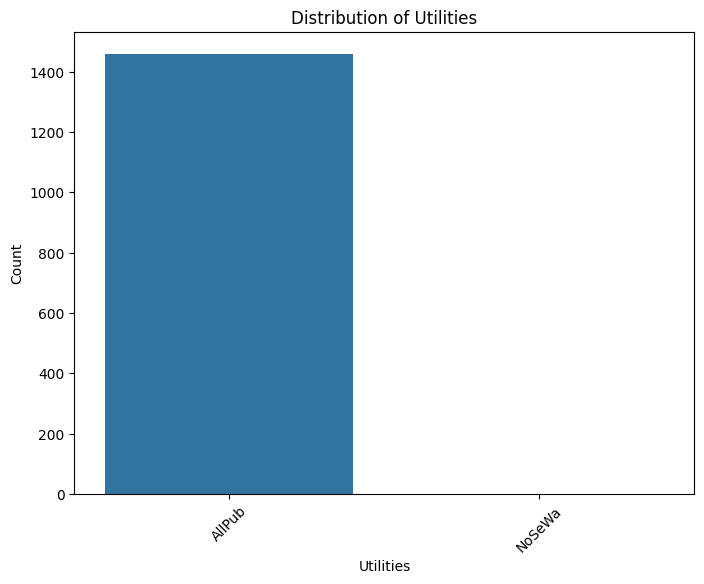

In [53]:
plot_categorical_features_hist('Utilities', train_df)

## SalePrice (Target Feature)

In [54]:
def analyse_SalePrice(df, feature):
    style.use("fivethirtyeight")
    
    fig = plt.figure(constrained_layout = True, figsize = (15, 8))
    grid = gridspec.GridSpec(ncols = 3, nrows = 2, figure = fig)
    
    #Histogram
    ax1 = fig.add_subplot(grid[0, :2])
    ax1.set_title('Histogram')
    sns.distplot(df.loc[:, feature], norm_hist = True, ax = ax1, color = 'g')
    
    #Probability Plot
    ax2 = fig.add_subplot(grid[1, :2])
    ax2.set_title('Probability Plot')
    stats.probplot(df.loc[:, feature], plot = ax2)
    
    #Box Plot
    ax3 = fig.add_subplot(grid[:, 2])
    ax3.set_title('Box Plot')
    sns.boxplot(df.loc[:, feature], orient = 'v', ax = ax3)

/tmp/ipykernel_32/2746253505.py:10: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




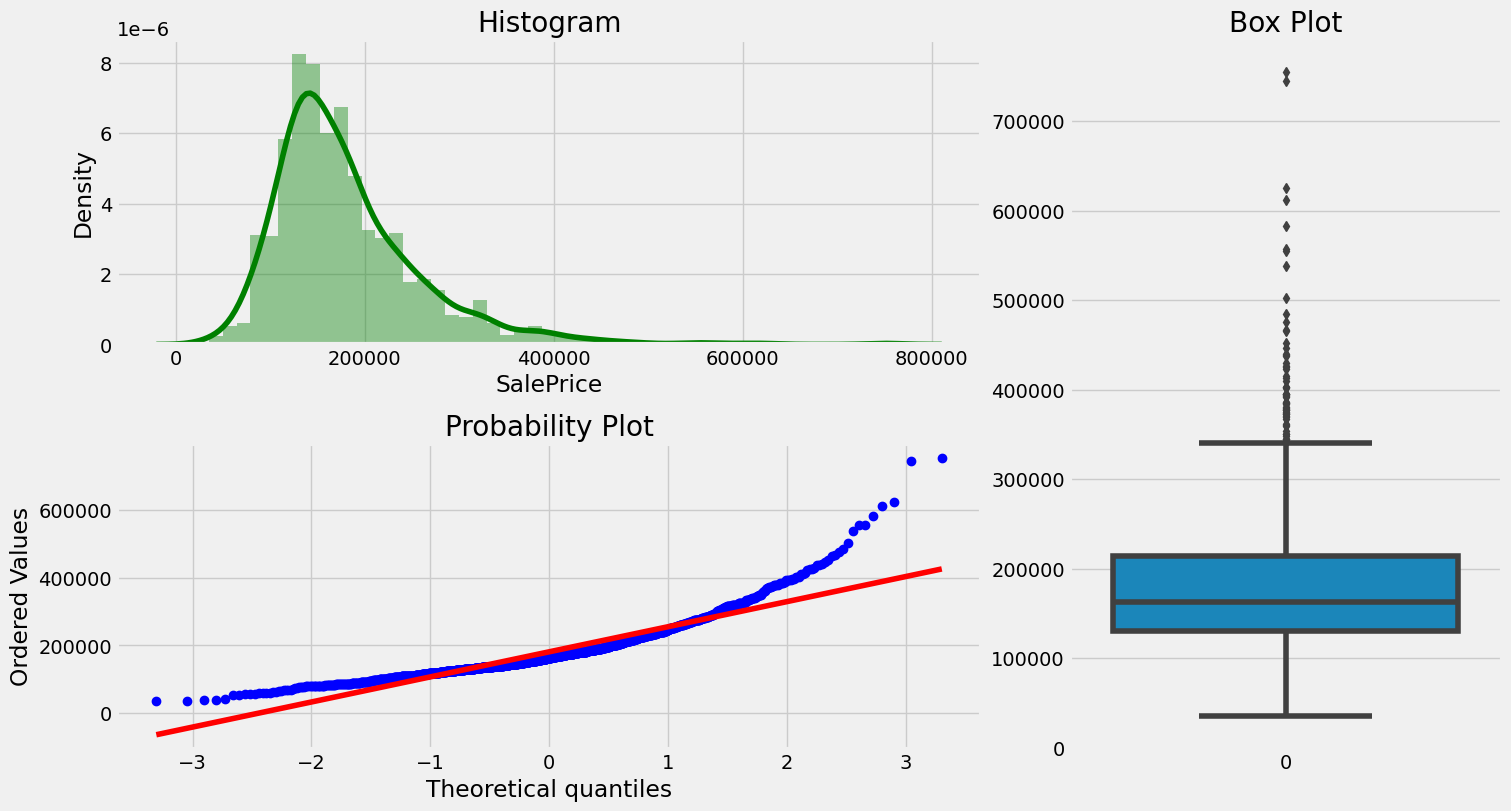

In [55]:
analyse_SalePrice(train_df, 'SalePrice')

# Corelation between inputs and target variable

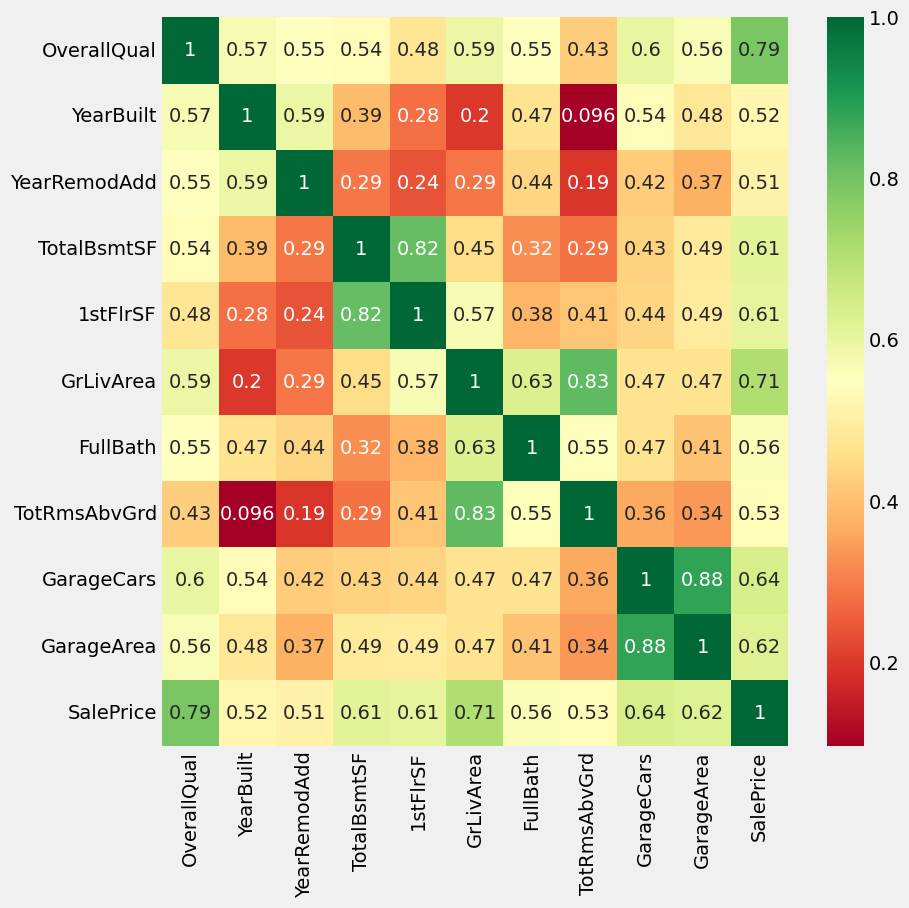

In [56]:
numeric_columns = train_df.select_dtypes(include=[np.number])
corrmat = numeric_columns.corr()
top_corr_features = corrmat.index[abs(corrmat["SalePrice"]) > 0.5]

# Create a heatmap
plt.figure(figsize=(9, 9))
g = sns.heatmap(train_df[top_corr_features].corr(), annot=True, cmap="RdYlGn")

## GrLivArea

<Figure size 600x300 with 0 Axes>

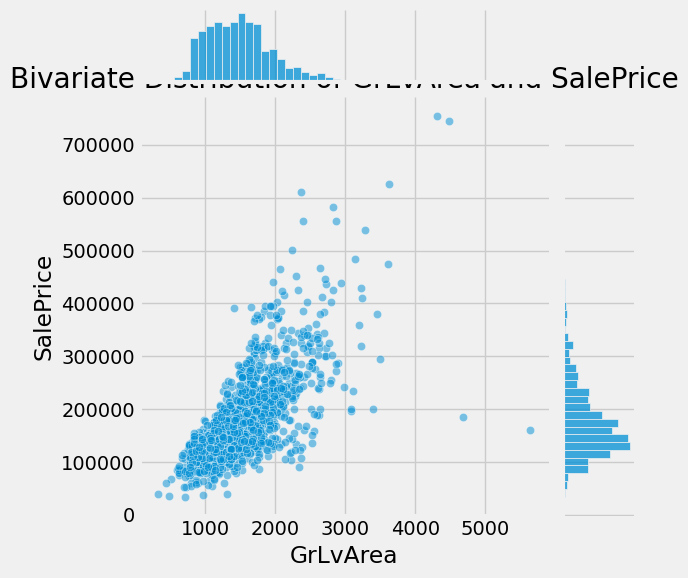

In [57]:
plt.figure(figsize=(6, 3))
sns.jointplot(x='GrLivArea', y='SalePrice', data=train_df, alpha=0.5)
plt.xlabel('GrLvArea')
plt.ylabel('SalePrice')
plt.title('Bivariate Distribution of GrLvArea and SalePrice')
plt.show()

Even though GrLivArea is the most powerful variable of SalePrice, it's not enough! You can see the larger GrLivArea, the linearity was even far collapsed (In statistic, it is called 'Corn Shape Heteroscedasticity') Our mission is to let know what variables makes us to figure out inner strucutre

## Utilities

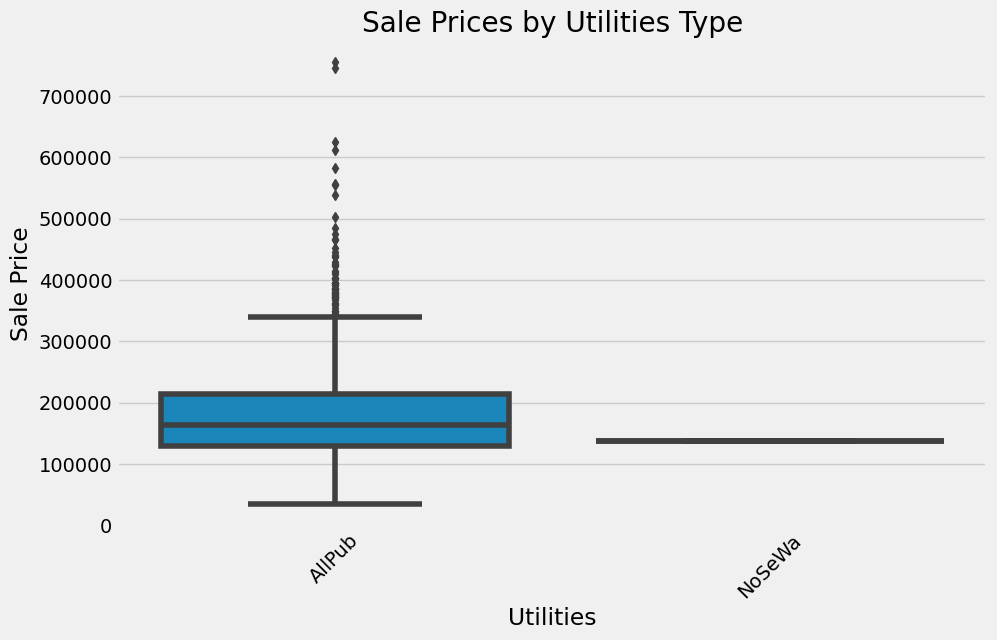

            count          mean           std       min       25%       50%  \
Utilities                                                                     
AllPub     1459.0  180950.95682  79461.599814   34900.0  129950.0  163000.0   
NoSeWa        1.0  137500.00000           NaN  137500.0  137500.0  137500.0   

                75%       max  
Utilities                      
AllPub     214000.0  755000.0  
NoSeWa     137500.0  137500.0  


In [58]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Utilities', y='SalePrice', data=train_df)
plt.title('Sale Prices by Utilities Type')
plt.xlabel('Utilities')
plt.ylabel('Sale Price')
plt.xticks(rotation=45)
plt.show()

# Calculate and print summary statistics for sale prices based on utility types
utility_stats = train_df.groupby('Utilities')['SalePrice'].describe()
print(utility_stats)

## OverallQual

Mean squared error: 2027943231.15


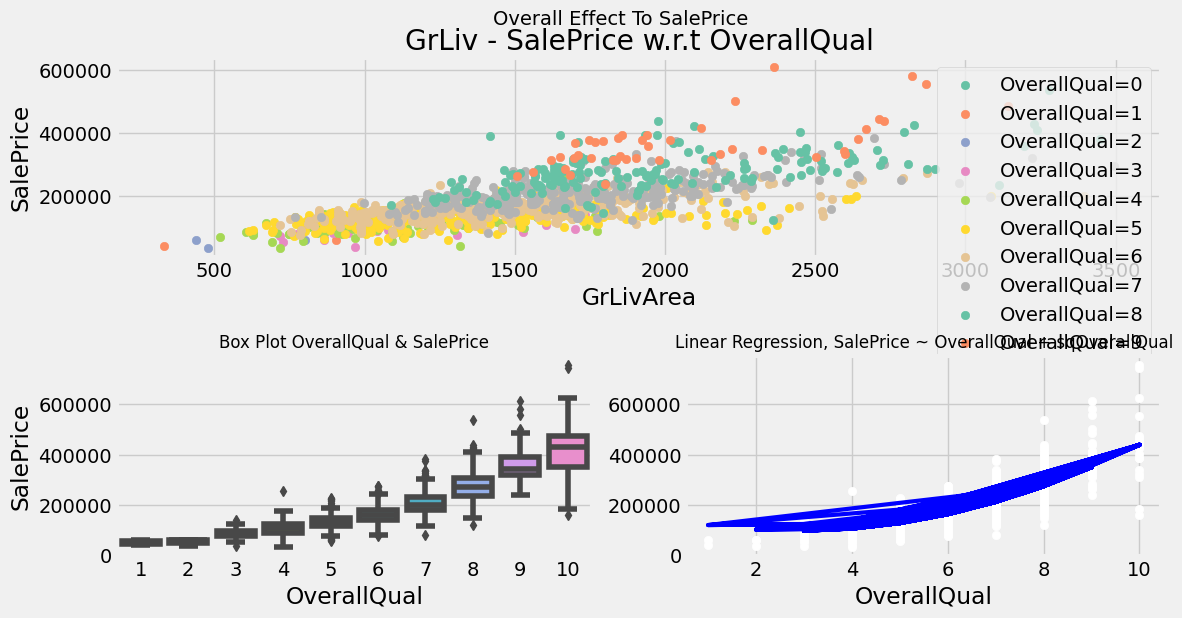

In [59]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

plt.figure(figsize = (12,6))
ax1 = plt.subplot2grid((2,2), (0,0), colspan = 2)
ax1.set_prop_cycle(color=sns.color_palette('Set2', 10))

for val in range(10):
    indeX = train_df.OverallQual == val
    ax1.scatter(train_df['GrLivArea'][indeX], train_df['SalePrice'][indeX], label=f'OverallQual={val}')
    
ax1.set_title('Scatter plot by OverallQual')
ax1.set_xlabel('GrLivArea')
ax1.set_ylabel('SalePrice')
ax1.legend()
ax1.set_xlabel('GrLivArea')
ax1.set_ylabel('SalePrice')
ax1.set_title('GrLiv - SalePrice w.r.t OverallQual')

ax2 = plt.subplot2grid((2,2), (1,0))
sns.boxplot(x = 'OverallQual', y = 'SalePrice', data = train_df, ax = ax2)
ax2.set_title('Box Plot OverallQual & SalePrice', fontsize = 12)

ax3 = plt.subplot2grid((2,2), (1,1))
cubicQual = train_df.groupby(['OverallQual'])['SalePrice'].mean().round(0)
testTrain = train_df.loc[:, ['OverallQual', 'SalePrice']].copy()
testTrain['sqOverallQual'] = np.power(testTrain['OverallQual'],2)
mdl = linear_model.LinearRegression()
mdl.fit(testTrain[['OverallQual', 'sqOverallQual']], testTrain['SalePrice'])
y_pred = mdl.predict(testTrain[['OverallQual', 'sqOverallQual']])
print("Mean squared error: %.2f" % mean_squared_error(y_pred, testTrain.SalePrice))
# Plot outputs
ax3.scatter(testTrain['OverallQual'], testTrain['SalePrice'],  color='w')
ax3.plot(testTrain['OverallQual'], y_pred, color='blue', linewidth=3)
ax3.set_title('Linear Regression, SalePrice ~ OverallQual + sqOverallQual', fontsize = 12)
ax3.set_xlabel('OverallQual')
plt.subplots_adjust(hspace = 0.5, top = 0.9)
plt.suptitle('Overall Effect To SalePrice', fontsize = 14)
plt.show()

OverallQual is the best variables among Ordinal Variables regard of explaining SalePrice. I Love to see OverallQual
Find

OverallQual causes different SalePrice where having same "GrLivArea". We have to put a strong attention!
OverallQual was proportional to SalePrice, and (1-2) almost identical.
Square of OverallQual was a good variables since linear regression (SalePrice ~ O.Q + O.Q^2) has good curve shape

## 2ndFlr & Basement

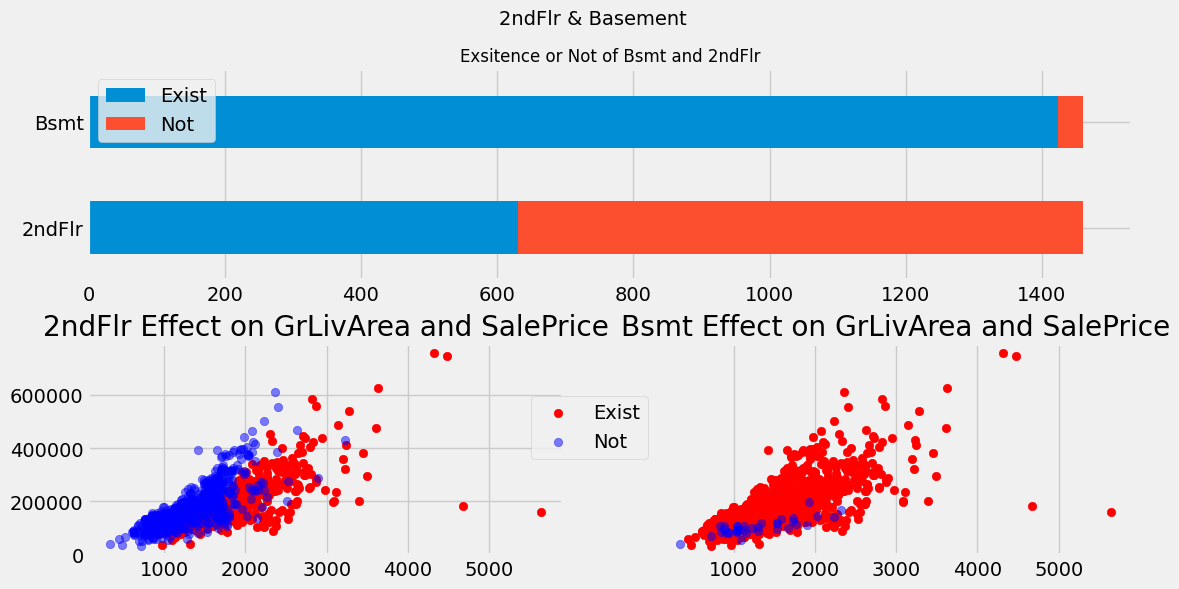

In [60]:
plt.figure(figsize = (12,6))
tf_train = train_df[['OverallQual','2ndFlrSF', 'TotalBsmtSF', 'SalePrice']].copy()
tf_train['GrLivArea'] = train_df['GrLivArea'].copy()
tf_train['2ndFlr'] = 'Exist'
tf_train.loc[tf_train['2ndFlrSF'] == 0 ,'2ndFlr'] = 'Not'
tf_train['Bsmt'] = 'Exist'
tf_train.loc[tf_train['TotalBsmtSF'] == 0 ,'Bsmt'] = 'Not'
ax1 = plt.subplot2grid((2,2), (0,0), colspan = 2)
tmp = tf_train[['2ndFlr', 'Bsmt']].apply(pd.Series.value_counts).T
tmp.plot.barh(stacked = True, ax = ax1)
ax1.set_title('Exsitence or Not of Bsmt and 2ndFlr', fontsize = 12)
ax2 = plt.subplot2grid((2,2), (1,0))
ax2.scatter(tf_train['GrLivArea'].loc[tf_train['2ndFlr'] == 'Exist'], tf_train['SalePrice'].loc[tf_train['2ndFlr'] == 'Exist'], color = 'r', alpha = 1, label = 'Exist')
ax2.scatter(tf_train['GrLivArea'].loc[tf_train['2ndFlr'] != 'Exist'], tf_train['SalePrice'].loc[tf_train['2ndFlr'] != 'Exist'], color = 'b', alpha = 0.5, label = 'Not')
ax2.set_title('2ndFlr Effect on GrLivArea and SalePrice')
ax2.legend(bbox_to_anchor = [1.2, 0.8])

ax3 = plt.subplot2grid((2,2), (1,1))
ax3.scatter(tf_train['GrLivArea'].loc[tf_train['Bsmt'] == 'Exist'], tf_train['SalePrice'].loc[tf_train['Bsmt'] == 'Exist'], color = 'r', alpha = 1)
ax3.scatter(tf_train['GrLivArea'].loc[tf_train['Bsmt'] != 'Exist'], tf_train['SalePrice'].loc[tf_train['Bsmt'] != 'Exist'], color = 'b', alpha = 0.5)
ax3.set_yticks([])
ax3.set_title('Bsmt Effect on GrLivArea and SalePrice')
plt.subplots_adjust(hspace = 0.3, wspace = 0.2)
plt.suptitle('2ndFlr & Basement', fontsize = 14)
plt.show()

2ndFlrSF depressed the power of GrLiva toward SalePrice
Bsmt has nothing related to the price, so I won't see anymore related to Bsmt

## Bath

In [61]:
bath = ['FullBath','HalfBath']#'BsmtFullBath', 'BsmtHalfBath',
cm = sns.light_palette("green", as_cmap=True)
pd.crosstab(train_df[bath[0]], train_df[bath[1]]).style.background_gradient(cmap = cm)

HalfBath,0,1,2
FullBath,,,
0,3,3,3
1,466,180,4
2,429,334,5
3,15,18,0


Full Correlation (GrLivArea - SalePrice)  0.71
(1, 0)Correlation 0.45 
(1, 1)Correlation 0.56 
(2, 0)Correlation 0.35 
(2, 1)Correlation 0.63 


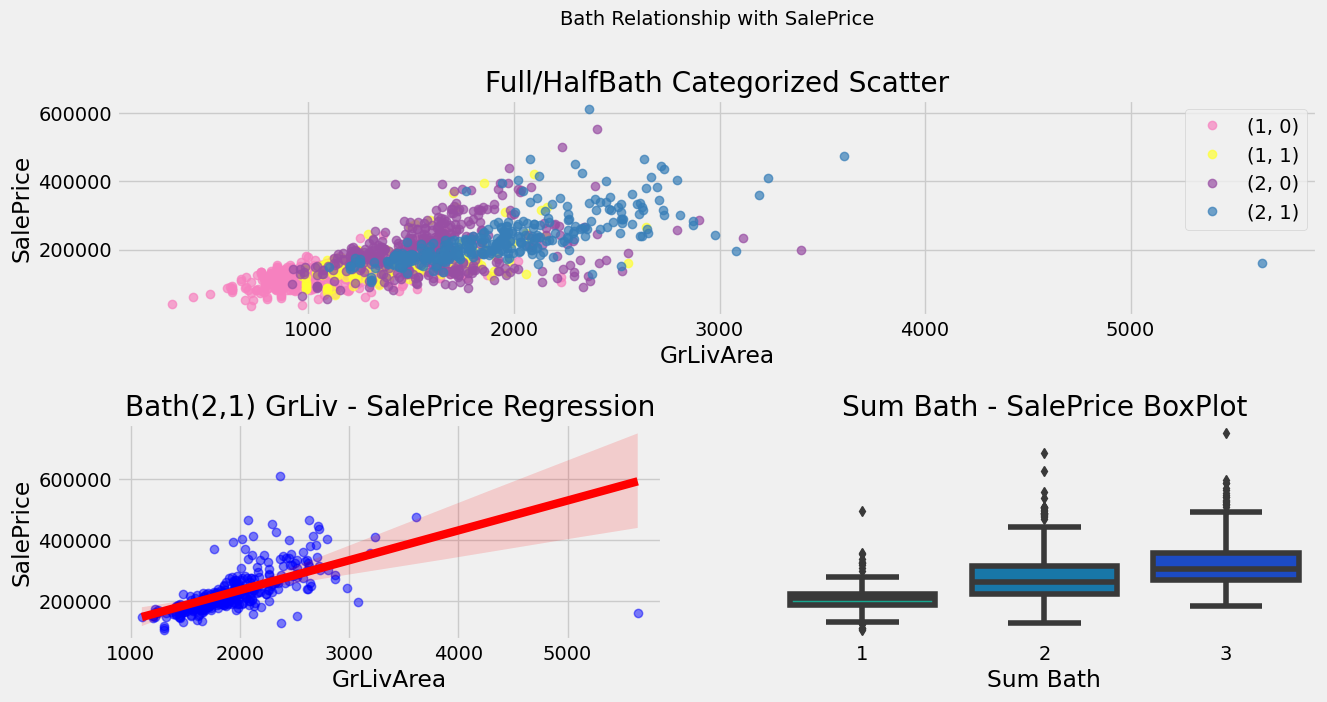

In [62]:
plt.figure(figsize = (12,6))
ax1= plt.subplot2grid((2,2), (0,0), colspan = 2)
colors = sns.color_palette('Set1_r', 4)
ax1.set_prop_cycle(color=colors)
groups = train_df.groupby(['FullBath', 'HalfBath'])
print('Full Correlation (GrLivArea - SalePrice) % .2f' % np.corrcoef(train_df['GrLivArea'], train_df['SalePrice'])[0][1])
for name, group in groups:
    if name in ((1,0), (1,1), (2,0), (2,1)):
        print(str(name) + 'Correlation %.2f ' % np.corrcoef(group['GrLivArea'], group['SalePrice'])[0][1])
        ax1.plot(group['GrLivArea'], group['SalePrice'], marker = 'o', linestyle = '', label = name, alpha = 0.7)
ax1.legend(loc = 'upper right')
ax1.set_title('Full/HalfBath Categorized Scatter')
ax1.set_xlabel('GrLivArea')
ax1.set_ylabel('SalePrice')

ax2= plt.subplot2grid((2,2), (1,0))
sns.regplot(x = 'GrLivArea', y = 'SalePrice', order = 1,
            data = train_df.loc[(train_df['FullBath'] == 2 ) & (train_df['HalfBath']==1), ['GrLivArea', 'SalePrice']], 
            ax = ax2, line_kws = {'color' : 'red'}, scatter_kws = {'color' : 'blue', 'alpha' : 0.5})
ax2.set_title('Bath(2,1) GrLiv - SalePrice Regression')
ax3= plt.subplot2grid((2,2), (1,1))
testTrain = train_df.loc[:, ['GrLivArea', 'SalePrice']].copy()
testTrain['Bath'] = train_df[['FullBath', 'HalfBath']].sum(axis = 1)
sns.boxplot(x = 'Bath', y = 'SalePrice', order= [1,2,3], data =testTrain, ax =ax3, palette =sns.color_palette('winter_r',3))
ax3.set_title('Sum Bath - SalePrice BoxPlot')
ax3.set_yticks([])
ax3.set_ylabel('')
ax3.set_xlabel('Sum Bath')

plt.subplots_adjust(0,0,1, 0.9,hspace = 0.5)
plt.suptitle('Bath Relationship with SalePrice', fontsize = 14, y = 1.05)
plt.show()

The Number of Bath usually increased the SalePrice, but especially (Full 2, Half1) improved the linearity and decreased the spreadness of SalePrice - GrLivArea.

## TotRoom

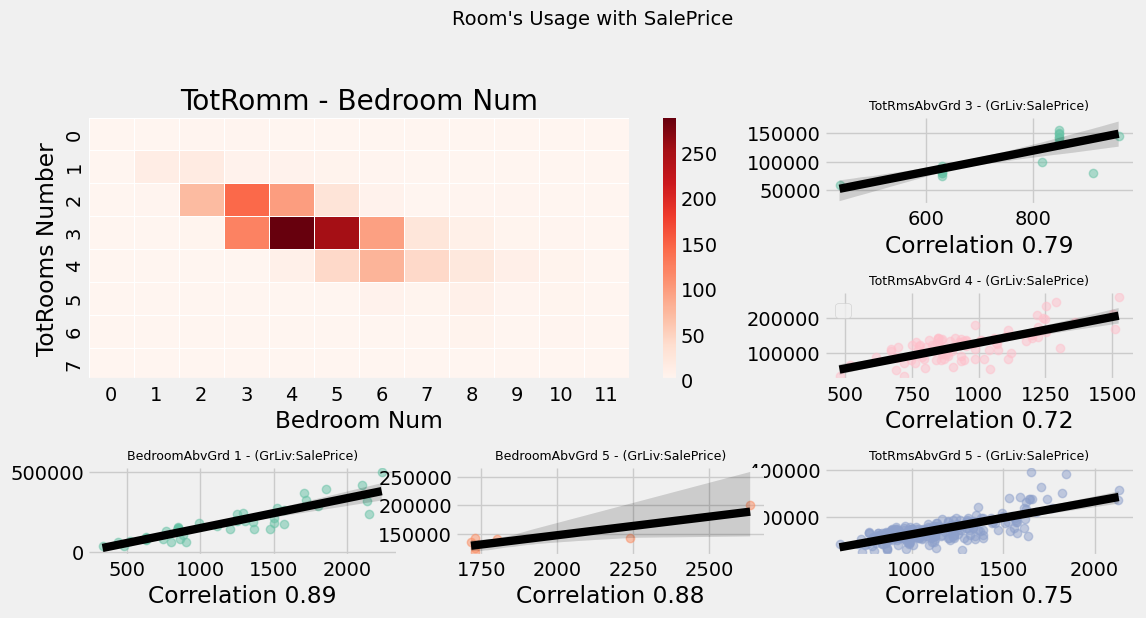

In [63]:
plt.figure(figsize = (12,6))
ax = plt.subplot2grid((3,3), (0,0), rowspan = 2, colspan = 2)
bath = ['BedroomAbvGr', 'TotRmsAbvGrd']#'BsmtFullBath', 'BsmtHalfBath',
test = pd.crosstab(train_df[bath[0]], train_df[bath[1]])
sns.heatmap(test.values, cmap = plt.cm.Reds, ax = ax, linewidths=.5), #yticklabels=False, xticklabels=False)
ax.set_ylabel('TotRooms Number')
ax.set_xlabel('Bedroom Num')
ax.set_title('TotRomm - Bedroom Num')


ax2 = plt.subplot2grid((3,3), (0,2))
colors = sns.color_palette('Set2',3)
pack = [3,4,5]
val = pack[0]
sns.regplot(x='GrLivArea', y = 'SalePrice', data = train_df.loc[train_df.TotRmsAbvGrd == val], 
            scatter_kws = {'color' : colors[val-3], 'alpha' : 0.5}, line_kws = {'color' : 'k'}, ax = ax2)
#ax2.set_yticklabels([])
ax2.set_title('TotRmsAbvGrd 3 - (GrLiv:SalePrice)', fontsize = 9)
ax2.set_ylabel('')
ax2.set_xlabel('Correlation ' + str(train_df.loc[train_df.TotRmsAbvGrd == val, ['GrLivArea', 'SalePrice']].corr().round(2).loc['GrLivArea','SalePrice']))

ax3 = plt.subplot2grid((3,3), (1,2))
val = pack[1]
sns.regplot(x='GrLivArea', y = 'SalePrice', data = train_df.loc[train_df.TotRmsAbvGrd == val], 
            scatter_kws = {'color' : 'pink', 'alpha' : 0.5}, line_kws = {'color' : 'k'}, ax = ax3)

ax3.set_ylabel('')
ax3.set_title('TotRmsAbvGrd 4 - (GrLiv:SalePrice)' , fontsize = 9)
ax3.set_xlabel('Correlation ' + str(train_df.loc[train_df.TotRmsAbvGrd == val, ['GrLivArea', 'SalePrice']].corr().round(2).loc['GrLivArea','SalePrice']))
ax3.legend()

ax4 = plt.subplot2grid((3,3), (2,2))
val = pack[2]
sns.regplot(x='GrLivArea', y = 'SalePrice', data = train_df.loc[train_df.TotRmsAbvGrd == val], 
            scatter_kws = {'color' : colors[val-3], 'alpha' : 0.5}, line_kws = {'color' : 'k'}, ax = ax4)
#ax4.set_yticklabels([])
ax4.set_title('TotRmsAbvGrd 5 - (GrLiv:SalePrice)' , fontsize = 9)
ax4.set_ylabel('')
ax4.set_xlabel('Correlation ' + str(train_df.loc[train_df.TotRmsAbvGrd == val, ['GrLivArea', 'SalePrice']].corr().round(2).loc['GrLivArea','SalePrice']))

pack = [1,6]

ax5 = plt.subplot2grid((3,3), (2,0))
val = pack[0]
sns.regplot(x='GrLivArea', y = 'SalePrice', data = train_df.loc[train_df.BedroomAbvGr == val], 
            scatter_kws = {'color' : colors[0], 'alpha' : 0.5}, line_kws = {'color' : 'k'}, ax = ax5)
#ax4.set_yticklabels([])
ax5.set_title('BedroomAbvGrd 1 - (GrLiv:SalePrice)' , fontsize = 9)
ax5.set_ylabel('')
ax5.set_xlabel('Correlation ' + str(train_df.loc[train_df.BedroomAbvGr == val, ['GrLivArea', 'SalePrice']].corr().round(2).loc['GrLivArea','SalePrice']))

ax6 = plt.subplot2grid((3,3), (2,1))
val = pack[1]
sns.regplot(x='GrLivArea', y = 'SalePrice', data = train_df.loc[train_df.BedroomAbvGr == val], 
            scatter_kws = {'color' : colors[1], 'alpha' : 0.5}, line_kws = {'color' : 'k'}, ax = ax6)
#ax4.set_yticklabels([])
ax6.set_title('BedroomAbvGrd 5 - (GrLiv:SalePrice)' , fontsize = 9)
ax6.set_ylabel('')
ax6.set_xlabel('Correlation ' + str(train_df.loc[train_df.BedroomAbvGr == val, ['GrLivArea', 'SalePrice']].corr().round(2).loc['GrLivArea','SalePrice']))


sns.despine(left = True)


plt.subplots_adjust(top = 0.8, hspace = 1)
plt.suptitle("Room's Usage with SalePrice", fontsize = 14)
plt.show()

HeatMap Said "TotRomAbvGrd ~ BedroomAbvGrd ~ Bath" are proportional to each other!
At TotRmsAbvGrd (3,4,5), the linearity w.r.t GrLiv-SalePrice was over 0.71.
At BedroomAbvGrd (0,1,2,3,4,5,6), the correlation wr.t. GrLiv-SalePrice was over 0.73

## Garage

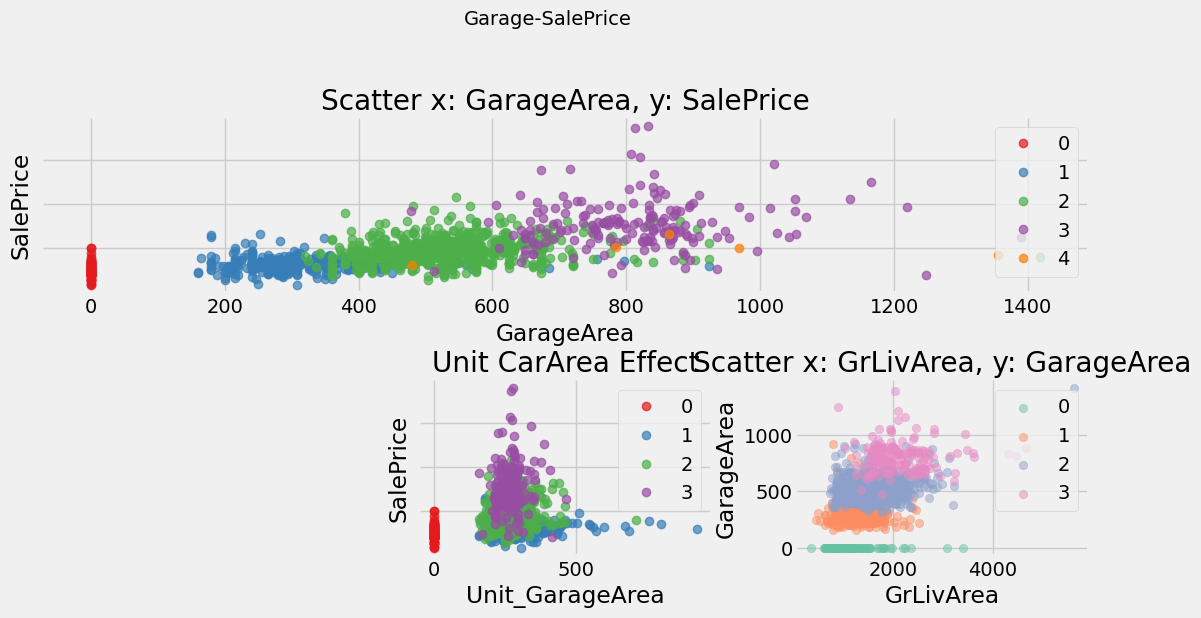

In [64]:
garage = ['GarageCars', 'GarageArea']
plt.figure(figsize=(12, 6))

palette = sns.color_palette('Set1', 5)
ax3 = plt.subplot2grid((2, 3), (0, 0), colspan=3)
ax3.set_prop_cycle(color=palette)
for val in range(5):
    indexV = train_df.GarageCars == val
    ax3.plot(train_df['GarageArea'].loc[indexV], train_df['SalePrice'].loc[indexV], marker='o', linestyle='', label=val, alpha=0.7)
ax3.set_xlabel('GarageArea')
ax3.set_ylabel('SalePrice')
ax3.set_title('Scatter x: GarageArea, y: SalePrice')
ax3.set_yticklabels([])
ax3.legend()

ax = plt.subplot2grid((2, 3), (1, 2))
num = [0, 1, 2, 3]
ax.set_prop_cycle(color=sns.color_palette('Set2', 4))
for val in num:
    index = train_df.GarageCars == val
    ax.scatter(train_df.GrLivArea.loc[index], train_df.GarageArea.loc[index], label=val, alpha=0.5)

ax.set_xlabel('GrLivArea')
ax.set_ylabel('GarageArea')
ax.set_title('Scatter x: GrLivArea, y: GarageArea')
ax.legend()

def functions(x):
    if x['GarageCars'] == 0:
        return 0
    else:
        return x['GarageArea'] / x['GarageCars']

unitCarArea = train_df.apply(functions, axis=1)

ax3 = plt.subplot2grid((2, 3), (1, 1))
ax3.set_prop_cycle(color=palette)
for val in range(4):
    indexV = train_df.GarageCars == val
    ax3.plot(unitCarArea.loc[indexV], train_df['SalePrice'].loc[indexV], marker='o', linestyle='', label=val, alpha=0.7)
ax3.set_xlabel('Unit_GarageArea')
ax3.set_ylabel('SalePrice')
ax3.set_title('Unit CarArea Effect')
ax3.set_yticklabels([])
ax3.legend()

sns.despine(left=True)
plt.subplots_adjust(wspace=0.3, hspace=0.5, top=0.8)
plt.suptitle('Garage-SalePrice', fontsize=14)
plt.show()


Most of houses have two cars
GarageArea makes Chunk having small lineratiy with SalePrice
0 Cars and 1 Cars has no difference in SalePrice
4 Cars are simliar with 3 Cars house. Merge them
(Update) Unt_Garage Area said that "Expensive house sustain the proper line of the area!"
(Update) GrLivArea is a good variable not related to GarageArea. Those two variables enforces the prediction power.

## Outsides

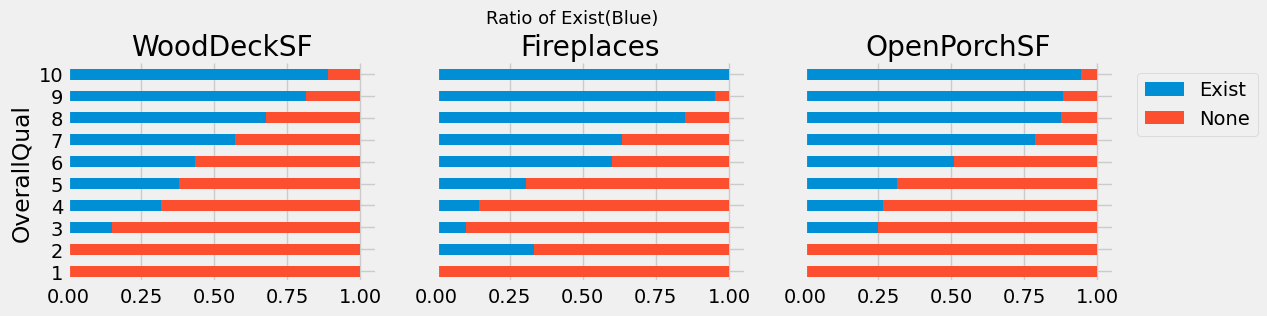

In [65]:
outSide = ['OpenPorchSF', 'Fireplaces','WoodDeckSF', 'EnclosedPorch','3SsnPorch', 'ScreenPorch','PoolArea']
dfOut = train_df[outSide].copy()
for x in outSide:
    dfOut[x].loc[dfOut[x] != 0] = 1
dfOut = dfOut.apply(pd.Series.value_counts).T
dfOut = dfOut / train_df.shape[0]
trace1 = go.Bar(
    x = dfOut[0],
    y = dfOut.index,
    name = 'Exist',
    orientation = 'h',
    marker = dict(
        color = 'rgba(246, 78, 139, 0.6)',
        line = dict(
            color = 'rgba(246, 78, 139, 1.0)',
            width = 3)
    )
)
trace2 = go.Bar(
    x = dfOut[1],
    y = dfOut.index,
    name = 'Null',
    orientation = 'h',
    marker = dict(
        color = 'rgba(58, 71, 80, 0.6)',
        line = dict(
            color = 'rgba(58, 71, 80, 1.0)',
            width = 3)
    )
)
data = [trace1, trace2]
layout1 = go.Layout(
    width = 800,
    height = 300,
    barmode = 'stack',
    title = 'Outside Exist or Not'
    )
fig = go.Figure(data = data, layout = layout1)

px =  plt.figure(figsize = (12,3))
#px.patch.set_facecolor('black')
ax1 = plt.subplot2grid((1,3), (0,0))
ax2 = plt.subplot2grid((1,3), (0,1))
ax3 = plt.subplot2grid((1,3), (0,2))
#According to OverQuall, WoodDeckSF's Proportion Exist or Not

for x, axis in zip(['WoodDeckSF', 'Fireplaces', 'OpenPorchSF'], [ax1, ax2, ax3]):
    dfOut = train_df[[x, 'OverallQual']].copy()
    dfOut[x].loc[dfOut[x] != 0] = 'Exist'
    dfOut[x].loc[dfOut[x] == 0] = 'None'
    tmp = pd.crosstab(dfOut[x], dfOut['OverallQual']).T
    tmp = tmp.divide(tmp.sum(axis = 1), axis = 0)
    tmp.plot.barh(stacked = True, ax = axis, legend = False)
    axis.set_title(x)
ax3.legend(bbox_to_anchor = [1.05, 1])
ax2.set_ylabel('')
ax3.set_ylabel('')
ax2.set_yticklabels('')
ax3.set_yticklabels('')
plt.subplots_adjust(top = 0.8)
plt.suptitle('Ratio of Exist(Blue)', fontsize = 13)
sns.despine()
py.iplot(fig)
plt.show()

Good Quality House has more outside instrumental places.
PoolArea, ScreenPorch, 3SsnPorch was almost not appeared

## Season

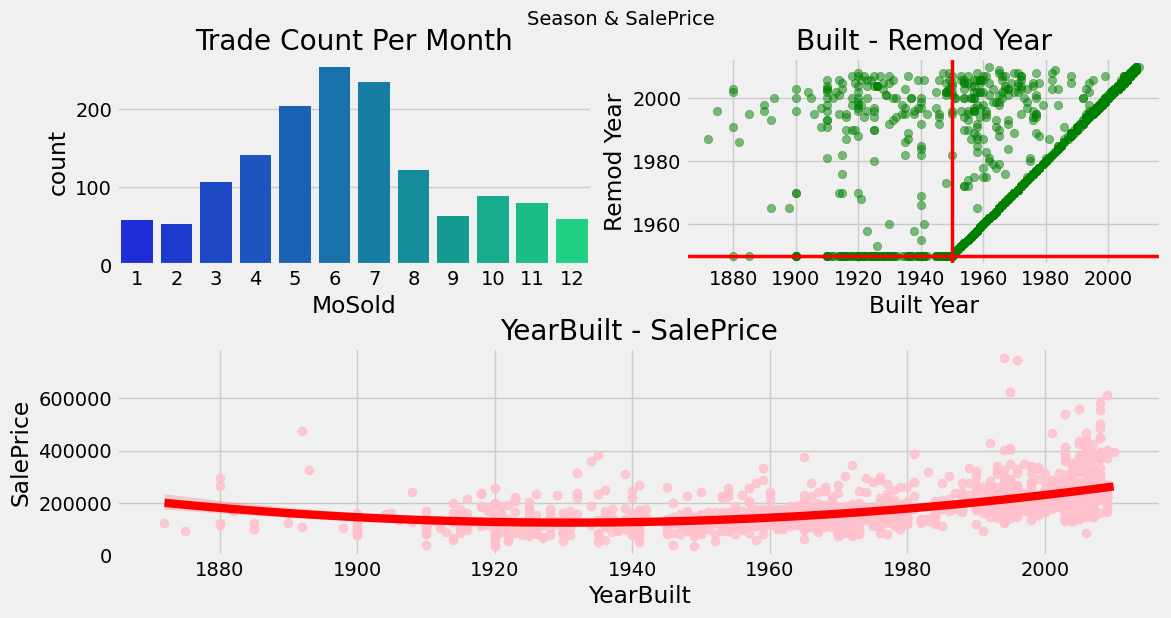

In [66]:
season = ['YearBuilt', 'YearRemodAdd','GarageYrBlt', 'MoSold', 'YrSold', 'SalePrice']
plt.figure(figsize = (12,6))
ax1 = plt.subplot2grid((2,2), (0,0))
sns.countplot(x = 'MoSold', palette = sns.color_palette('winter', 12), data =train_df, ax = ax1)
ax1.set_title('Trade Count Per Month')

ax2 = plt.subplot2grid((2,2), (0,1))
ax2.scatter(x = train_df['YearBuilt'], y = train_df['YearRemodAdd'], alpha = 0.5, color = 'g')
ax2.axvline(1950, color = 'red', linewidth = 2.5)
ax2.axhline(1950, color = 'red', linewidth = 2.5)
ax2.set_xlabel('Built Year')
ax2.set_ylabel('Remod Year')
ax2.set_title('Built - Remod Year')

ax3 = plt.subplot2grid((2,2), (1,0), colspan = 2)
sns.regplot(x = 'YearBuilt', y = 'SalePrice', color = 'pink', order = 2, line_kws = {'color' : 'red'}, ax = ax3, data =train_df)
ax3.set_title('YearBuilt - SalePrice')
plt.subplots_adjust(top = 0.9, hspace = 0.4)
plt.suptitle('Season & SalePrice', fontsize = 14)
#sns.despine()
plt.show()

The amount of trade was increased by rising temperature
Most of old built house remodeled at 1950.
The part of house, built after 1950, was not remodeled yet
YearBuilt^2 is proper if the variables is used to predict

# Hypothesis tests

## 1.Hypothesis Test for the Difference in Sale Prices of Houses with and without Central Air Conditioning

Null Hypothesis (H0): The presence or absence of central air conditioning does not significantly affect the sale price of a house.


Alternative Hypothesis (H1): The presence or absence of central air conditioning significantly affects the sale price of a house.

In [67]:
train_df['CentralAir'].unique()

array(['Y', 'N'], dtype=object)

In [68]:
# Split the data into two groups based on CentralAir 
with_air_conditioning = train_df[train_df['CentralAir'] == 'Y']['SalePrice']
without_air_conditioning = train_df[train_df['CentralAir'] == 'N']['SalePrice']

# Perform a t-test
t_stat, p_value = stats.ttest_ind(with_air_conditioning, without_air_conditioning)

# Set the significance level (alpha)
alpha = 0.05

# Display the results
print("T-statistic:", t_stat)
print("P-value:", p_value)

# Compare the p-value to alpha to make a decision
if p_value < alpha:
    print("Reject the null hypothesis (H0)")
else:
    print("Fail to reject the null hypothesis (H0)")


T-statistic: 9.914905121389344
P-value: 1.8095061559266025e-22
Reject the null hypothesis (H0)


## 2. One-way ANOVA test to assess how different types of heating affect sale prices

Null Hypothesis (H0): Different types of heating do not significantly affect sale prices.


Alternative Hypothesis (H1): Different types of heating significantly affect sale prices.

In [69]:
heating_groups = [train_df[train_df['Heating'] == heating_type]['SalePrice'] for heating_type in train_df['Heating'].unique()]

# Perform a one-way ANOVA
f_statistic, p_value = f_oneway(*heating_groups)

# Set the significance level (alpha)
alpha = 0.05

# Display the results
print("F-statistic:", f_statistic)
print("P-value:", p_value)

# Compare the p-value to alpha to make a decision
if p_value < alpha:
    print("Reject the null hypothesis (H0)")
else:
    print("Fail to reject the null hypothesis (H0)")

F-statistic: 4.259818559406287
P-value: 0.000753472106445497
Reject the null hypothesis (H0)


## 3. Z-test to check how The overall quality of a house affect sale prices

Null Hypothesis (H0): The overall quality of a house does not significantly affect its sale price.

Alternative Hypothesis (H1): The overall quality of a house significantly affects its sale price.

In [70]:
# Select the independent variable (Overall Quality) and dependent variable (Sale Price)
X = train_df['OverallQual']
y = train_df['SalePrice']

# Population parameters (replace with your population values)
population_mean = X.mean()  # Population mean of Overall Quality
population_std = X.std()    # Population standard deviation of Overall Quality

# Sample statistics
sample_mean = X.mean()  # Sample mean of Overall Quality
sample_size = len(X)    # Sample size

# Calculate the Z-statistic
z_statistic = (sample_mean - population_mean) / (population_std / (sample_size**0.5))

# Set the significance level (alpha)
alpha = 0.05

# Perform a Z-test
p_value = 2 * (1 - stats.norm.cdf(abs(z_statistic)))  # Two-tailed test

# Display the results
print("Z-statistic:", z_statistic)
print("P-value:", p_value)

# Compare the p-value to alpha to make a decision
if p_value < alpha:
    print("Reject the null hypothesis (H0)")
else:
    print("Fail to reject the null hypothesis (H0)")

Z-statistic: 0.0
P-value: 1.0
Fail to reject the null hypothesis (H0)


## 4. ANOVA Test for the Effect of Neighborhood on Sale Price

Null Hypothesis (H0): Neighborhood does not significantly affect sale price.

Alternative Hypothesis (H1): Neighborhood significantly affects sale price.

In [71]:
# Create a list of sale prices for each neighborhood
neighborhood_groups = [train_df[train_df['Neighborhood'] == neighborhood]['SalePrice'] for neighborhood in train_df['Neighborhood'].unique()]

# Perform an analysis of variance (ANOVA)
f_stat, p_value = f_oneway(*neighborhood_groups)

# Display the results
print("F-statistic:", f_stat)
print("P-value:", p_value)

# Set the significance level (alpha)
alpha = 0.05

# Compare the p-value to alpha to make a decision
if p_value < alpha:
    print("Reject the null hypothesis (H0)")
else:
    print("Fail to reject the null hypothesis (H0)")


F-statistic: 71.78486512058272
P-value: 1.558600282771154e-225
Reject the null hypothesis (H0)


Null Hypothesis (H0): This is the hypothesis that you want to test. It suggests that the neighborhood in which a house is located does not significantly affect its sale price. In other words, it assumes that any differences in sale prices observed among neighborhoods are due to random chance.

Alternative Hypothesis (H1): This is the opposing hypothesis. It suggests that the neighborhood significantly affects the sale price of a house, indicating that there are real and statistically significant differences in sale prices among neighborhoods.

Based on the F-statistic and the very low P-value:

The F-statistic of 71.78486512058272 is relatively large, indicating that there is a substantial variance in sale prices among different neighborhoods.

The extremely low P-value (approximately 1.558600282771154e-225) suggests that the probability of observing the differences in sale prices among neighborhoods by random chance is almost zero. It indicates strong evidence against the null hypothesis.

Conclusion:

Given the very low P-value and the high F-statistic, you can confidently reject the null hypothesis (H0). This means that there is strong statistical evidence to support the alternative hypothesis (H1). In practical terms, this suggests that the neighborhood significantly affects the sale price of houses. In other words, the choice of neighborhood is associated with real and statistically significant differences in sale prices.

## 5. Hypothesis Test for the Association between Roof Style and House Style (Chi-Square Test)

Null Hypothesis (H0): The roof style and house style are independent of each other.


Alternative Hypothesis (H1): The roof style and house style are associated with each other.

In [72]:
train_df['RoofStyle'].unique()

array(['Gable', 'Hip', 'Gambrel', 'Mansard', 'Flat', 'Shed'], dtype=object)

In [73]:
train_df['HouseStyle'].unique()

array(['2Story', '1Story', '1.5Fin', '1.5Unf', 'SFoyer', 'SLvl', '2.5Unf',
       '2.5Fin'], dtype=object)

In [74]:
contingency_table = pd.crosstab(train_df['RoofStyle'], train_df['HouseStyle'])
# Perform the chi-square test for independence
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Set the significance level (alpha)
alpha = 0.05

# Display the results
print("Chi-square statistic:", chi2)
print("P-value:", p)

# Compare the p-value to alpha to make a decision
if p < alpha:
    print("Reject the null hypothesis (H0)")
else:
    print("Fail to reject the null hypothesis (H0)")

Chi-square statistic: 110.37414218384495
P-value: 9.773376599468189e-10
Reject the null hypothesis (H0)
